# Test statistics and p-values

Vamos a realizar unos apuntes complementarios y visuales a los que tenemos en la libreta de apuntes, para poder entender mejor los conceptos mediante la realización de gráficas.

In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set default Seaborn style
sns.set()

In [2]:
# Importamos el set de datos
#dataset = pd.read_csv('data/pennsylvania2012.csv', header=0)
datafrog = pd.read_csv('data/frog_tongue(update).csv')

# Seleccionamos la información conveniente del datafrog
force_frog = datafrog.loc[:,['ID', 'impact force (mN)']]

# Pequeña visualización de los datos
#dataset.head()
force_frog.head()

,ID,impact force (mN)
0,I,1205
1,I,2527
2,I,1745
3,I,1556
4,I,493


In [3]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Generating permutation replicates

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Compute difference of mean

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

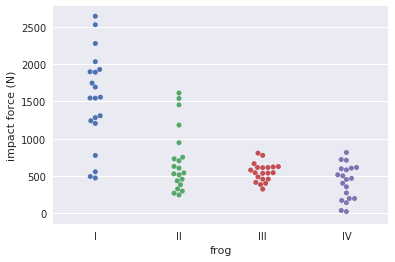

In [4]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact force (mN)', data=force_frog)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

Podemos calcular la media de la fuerza de cada rana, y posteriormente calcular la diferencia. Es posible que, en realidad, las ranas ataquen con la misma fuerza y esta diferencia observada fue por casualidad. Para comprobar esto, vamos a calcular la probabilidad de obtener al menos una diferencia de 0.29 N en la fuerza de ataque media bajo la **hipótesis** de que las **distribuciones** de las fuerzas de ataque para las dos ranas son **idénticas**. Utilizaremos *una prueba de permutación*, con un estadístico de prueba que será *la diferencia de medias* para probar esta hipótesis.

In [5]:
# Seleccionamos la rana y su fuerza
force_a = force_frog[force_frog.loc[:,'ID'] == 'II']['impact force (mN)'].values/1000
force_b = force_frog[force_frog.loc[:,'ID'] == 'IV']['impact force (mN)'].values/1000

In [6]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0059


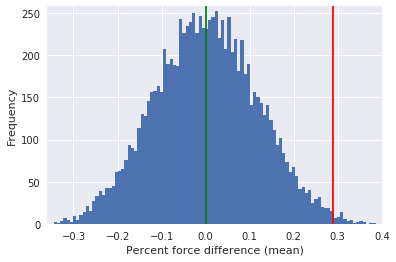

In [12]:
# Compute number of data points: n_data
n_data = len(perm_replicates)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# plot the histogram
plt.hist(perm_replicates, bins=n_bins)

# Margin and labels
plt.margins(0.02)
plt.xlabel('Percent force difference (mean)')
plt.ylabel('Frequency')

# Draw a line p-value
plt.axvline(x=np.mean(perm_replicates), color='green')
plt.axvline(x=empirical_diff_means, color='red')

plt.show()

## Bootstraping hypothesis test, one-sample

Ahora vamos a suponer que no tenemos la información de una de las ranas, pero si tenemos su media. Al no tener acceso a los datos no podemos proceder a realizar permutaciones de estos, sino que debemos proceder de distinta manera.
La hipótesis que vamos a realizar es que ambas ranas tienen medias parecidas o iguales

In [8]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

NameError: name 'draw_bs_reps' is not defined

### A bootstrap test for identical distributions

In the video, we looked at a one-sample test, but we can do two sample tests. We can even test the same hypothesis that we tested with a permutation test: that the Frog A and Frog B have identically distributed impact forces. To do this test on two arrays with n1 and n2 entries, we do a very similar procedure as a permutation test. We concatenate the arrays, generate a bootstrap sample from it, and take the first n1 entries of the bootstrap sample as belonging to the first data set and the last n2 as belonging to the second. We then compute the test statistic, e.g., the difference of means, to get a bootstrap replicate. The p-value is the number of bootstrap replicates for which the test statistic is less than what was observed.

Now, you will perform a bootstrap test of the hypothesis that Frog A and Frog B have identical distributions of impact forces using the difference of means test statistic.

The two arrays are available to you as force_a and force_b.

In [ ]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a, force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


### A two-sample bootstrap hypothesis test for difference of means.

You performed a one-sample bootstrap hypothesis test, which is impossible to do with permutation. Testing the hypothesis that two samples have the same distribution may be done with a bootstrap test, but a permutation test is preferred because it is more accurate (exact, in fact). But therein lies the limit of a permutation test; it is not very versatile. We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution. This, too, is impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

The objects forces_concat and empirical_diff_means are already in your namespace.

In [ ]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)